**ENHANCING FOOTBALL TRANSFER STRATEGIES: A DATA-DRIVEN APPROACH TO PLAYER RECOMMENDATİONS**

In [ ]:
!pip install soccerplots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
from soccerplots.radar_chart import Radar
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
pd.options.display.max_columns = 401
data = pd.read_csv("/content/drive/MyDrive/football_stats_2019_20.csv")
datacp = data.copy()

In [ ]:
datacp

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,foot,league,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,21,Martin Aguirregabiria,es ESP,DF,AlavĂ©s,23,1996,4000000,178,Defender - Right-Back,right,La Liga,31,23,2099,1,1,0,0,5,1,0.04,0.04,0.09,0.04,0.09,0.9,0.9,1.0,0.04,0.04,0.08,0.04,0.08,23.3,3,1,0,33.3,0.13,0.04,0.33,1.00,0.30,0.1,0.1,722,1014,71.2,12629,6069,329,385,85.5,314,408,77.0,70,172,40.7,0.0,12,36,14,5,60,765,249,9,1,161,22,30,2,0,1,0,484,234,296,39,661,61,238,3,3,31,17,44,23,0.99,18,1,2,0,2,3,0.13,3,0,0,0,0,0,50,22,24,21,5,25,50,50.0,25,248,60,24.2,118,106,24,39,8,0,31,9,68,1,1231,83,395,675,223,9,986,14,26,53.8,16,3,636,3313,1909,677,608,89.8,20,17,0,32,19,1,0,1,0,207,23,20,53.5
1,390,Oliver Burke,sco SCO,"MF,FW",AlavĂ©s,22,1997,4000000,188,Forward - Right Winger,right,La Liga,31,14,1429,1,2,0,0,2,0,0.06,0.13,0.19,0.06,0.19,3.2,3.2,1.2,0.20,0.07,0.27,0.20,0.27,15.9,20,9,0,45.0,1.26,0.57,0.05,0.11,0.16,-2.2,-2.2,226,333,67.9,3022,738,149,191,78.0,61,95,64.2,7,16,43.8,0.8,6,9,6,0,18,323,10,0,1,90,3,19,0,0,0,0,204,72,57,28,230,46,7,2,1,4,5,17,16,1.01,12,0,3,0,0,2,0.13,2,0,0,0,0,0,20,5,7,8,5,9,23,39.1,14,270,56,20.7,49,145,76,25,2,0,23,6,14,0,526,23,80,246,242,57,516,26,44,59.1,29,0,326,2795,1676,615,356,57.9,32,33,0,19,11,1,0,0,0,75,23,38,37.7
2,430,VĂ­ctor Camarasa,es ESP,MF,AlavĂ©s,25,1994,4000000,183,Midfielder - Central Midfield,right,La Liga,17,15,1293,0,1,0,0,1,0,0.00,0.07,0.07,0.00,0.07,0.3,0.3,1.6,0.02,0.11,0.13,0.02,0.13,14.4,8,2,0,25.0,0.56,0.14,0.00,0.00,0.04,-0.3,-0.3,430,533,80.7,8342,1719,187,222,84.2,177,201,88.1,60,94,63.8,-0.6,14,36,12,2,36,491,42,24,2,121,26,13,11,4,4,1,359,77,97,53,448,21,1,1,1,14,8,11,24,1.67,17,4,1,0,1,2,0.14,0,2,0,0,0,0,17,14,8,8,1,6,19,31.6,13,254,65,25.6,59,163,32,16,3,0,13,10,18,0,662,24,113,413,171,11,624,16,29,55.2,16,1,463,2401,976,512,432,84.4,23,12,0,14,15,2,0,0,0,114,12,15,44.4
3,737,RubĂ©n Duarte,es ESP,DF,AlavĂ©s,23,1995,4000000,172,Defender - Left-Back,left

In [ ]:
datacp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Columns: 157 entries, Column1 to aerials_won_pct
dtypes: float64(34), int64(116), object(7)
memory usage: 3.2+ MB



- 'minutes': The total number of minutes a player has been on the field during a match.
- 'goals': The number of goals a player has scored.
- 'assists': The number of assists a player has made, which means providing a pass or play that leads directly to a goal scored by a teammate.
- 'pens_made': The number of penalty kicks a player has successfully scored.
- 'pens_att': The number of penalty kicks a player has attempted.
- 'cards_yellow': The number of yellow cards a player has received for fouls or misconduct.
- 'cards_red': The number of red cards a player has received, resulting in ejection from the match.
- 'goals_per90': The average number of goals a player scores per 90 minutes played.
- 'assists_per90': The average number of assists a player makes per 90 minutes played.
- 'goals_assists_per90': The combined average of goals and assists per 90 minutes played.
- 'goals_pens_per90': The average number of goals scored, including penalty kicks, per 90 minutes played.
- 'goals_assists_pens_per90': The combined average of goals, assists, and penalty kicks per 90 minutes played.
- 'xg': Expected goals, a statistical measure estimating the likelihood of a shot resulting in a goal based on historical data.
- 'npxg': Non-penalty expected goals, which excludes the expected goals from penalty kicks.
- 'xa': Expected assists, a statistical measure estimating the likelihood of a pass leading to an assist based on historical data.
- 'xg_per90': The average expected goals a player has per 90 minutes played.
- 'xa_per90': The average expected assists a player has per 90 minutes played.
- 'xg_xa_per90': The combined average of expected goals and expected assists per 90 minutes played.
- 'npxg_per90': The average non-penalty expected goals a player has per 90 minutes played.
- 'npxg_xa_per90': The combined average of non-penalty expected goals and expected assists per 90 minutes played.
- 'minutes_90s': The number of 90-minute intervals a player has been on the field.
- 'shots_total': The total number of shots a player has taken.
- 'shots_on_target': The number of shots a player has taken that were on target.
- 'shots_free_kicks': The number of shots a player has taken from free kicks.
- 'shots_on_target_pct': The percentage of shots on target out of total shots taken by a player.
- 'shots_total_per90': The average number of total shots a player takes per 90 minutes played.
- 'shots_on_target_per90': The average number of shots on target a player has per 90 minutes played.
- 'goals_per_shot': The ratio of goals scored to total shots taken by a player.
- 'goals_per_shot_on_target': The ratio of goals scored to shots on target by a player.
- 'npxg_per_shot': The ratio of non-penalty expected goals to total shots taken by a player.
- 'xg_net': The difference between a player's goals scored and the expected goals they were predicted to score.
- 'npxg_net': The difference between a player's non-penalty goals scored and the expected non-penalty goals they were predicted to score.
- 'passes_completed': The number of passes successfully completed by a player.
- 'passes': The total number of passes attempted by a player.
- 'passes_pct': The percentage of passes successfully completed out of

 total passes attempted by a player.
- 'passes_total_distance': The total distance covered by a player's passes.
- 'passes_progressive_distance': The distance covered by a player's passes that move the team forward towards the opponent's goal.
- 'passes_completed_short': The number of short passes successfully completed by a player.
- 'passes_short': The total number of short passes attempted by a player.
- 'passes_pct_short': The percentage of short passes successfully completed out of total short passes attempted by a player.
- 'passes_completed_medium': The number of medium-range passes successfully completed by a player.
- 'passes_medium': The total number of medium-range passes attempted by a player.
- 'passes_pct_medium': The percentage of medium-range passes successfully completed out of total medium-range passes attempted by a player.
- 'passes_completed_long': The number of long-range passes successfully completed by a player.
- 'passes_long': The total number of long-range passes attempted by a player.
- 'passes_pct_long': The percentage of long-range passes successfully completed out of total long-range passes attempted by a player.
- 'xa_net': The difference between a player's assists and the expected assists they were predicted to make.
- 'assisted_shots': The number of shots a player has assisted.
- 'passes_into_final_third': The number of passes a player has made into the final third of the pitch.
- 'passes_into_penalty_area': The number of passes a player has made into the penalty area.
- 'crosses_into_penalty_area': The number of crosses a player has made into the penalty area.
- 'progressive_passes': The number of passes a player has made that move the team significantly closer to the opponent's goal.
- 'passes_live': The number of passes a player has made while the ball is in play.
- 'passes_dead': The number of passes a player has made while the ball is out of play.
- 'passes_free_kicks': The number of passes a player has made from free kicks.
- 'through_balls': The number of passes a player has made through the opposition's defensive line.
- 'passes_pressure': The number of passes a player has made while under pressure from an opponent.
- 'passes_switches': The number of passes a player has made switching the play from one side of the pitch to the other.
- 'crosses': The total number of crosses a player has attempted.
- 'corner_kicks': The total number of corner kicks a player has taken.
- 'corner_kicks_in': The number of corner kicks a player has taken that were delivered into the penalty area.
- 'corner_kicks_out': The number of corner kicks a player has taken that were delivered outside the penalty area.
- 'corner_kicks_straight': The number of corner kicks a player has taken that were delivered straight into the penalty area.
- 'passes_ground': The number of passes a player has made along the ground.
- 'passes_low': The number of low passes a player has made.
- 'passes_high': The number of high passes a player has made.
- 'passes_left_foot': The number of passes a player has made using their left foot.
- 'passes_right_foot': The number of passes a player has made using their right foot.
- 'passes_head': The number of passes a player has made using their head.
- 'throw_ins': The number of throw-ins taken by a player.
- 'passes_other_body': The number of passes a player has made using a body part other than their foot or head.
- 'passes_offsides': The number of passes a player has made that were received by an offside teammate.
- 'passes_oob': The number of passes a player has made

 that went out of bounds.
- 'passes_intercepted': The number of passes a player has had intercepted by an opponent.
- 'passes_blocked': The number of passes a player has had blocked by an opponent.
- 'sca': Shot-creating actions, which is the total number of shots and assists a player has been directly involved in.
- 'sca_per90': The average shot-creating actions per 90 minutes played.
- 'sca_passes_live': The number of shot-creating actions involving passes made while the ball is in play.
- 'sca_passes_dead': The number of shot-creating actions involving passes made while the ball is out of play.
- 'sca_dribbles': The number of shot-creating actions involving successful dribbles.
- 'sca_shots': The number of shot-creating actions involving shots.
- 'sca_fouled': The number of shot-creating actions resulting from the player being fouled.
- 'gca': Goal-creating actions, which is the total number of goals and assists a player has been directly involved in.
- 'gca_per90': The average goal-creating actions per 90 minutes played.
- 'gca_passes_live': The number of goal-creating actions involving passes made while the ball is in play.
- 'gca_passes_dead': The number of goal-creating actions involving passes made while the ball is out of play.
- 'gca_dribbles': The number of goal-creating actions involving successful dribbles.
- 'gca_shots': The number of goal-creating actions involving shots.
- 'gca_fouled': The number of goal-creating actions resulting from the player being fouled.
- 'gca_og_for': The number of own goals a player has been involved in for the opposition.
- 'tackles': The number of tackles a player has attempted to regain possession of the ball.
- 'tackles_won': The number of tackles successfully won by a player.
- 'tackles_def_3rd': The number of tackles a player has made in the defensive third of the pitch.
- 'tackles_mid_3rd': The number of tackles a player has made in the middle third of the pitch.
- 'tackles_att_3rd': The number of tackles a player has made in the attacking third of the pitch.
- 'dribble_tackles': The number of successful tackles made while attempting to dispossess an opponent who is dribbling the ball.
- 'dribbles_vs': The number of times a player has been dribbled past by an opponent.
- 'dribble_tackles_pct': The percentage of successful dribble tackles out of total attempted dribble tackles by a player.
- 'dribbled_past': The number of times a player has been dribbled past by an opponent.
- 'pressures': The total number of times a player has applied pressure on opponents to regain possession of the ball.
- 'pressure_regains': The number of times a player has regained possession of the ball as a result of applying pressure on opponents.
- 'pressure_regain_pct': The percentage of successful pressure regains out of total pressures applied by a player.
- 'pressures_def_3rd': The number of pressures a player has applied in the defensive third of the pitch.
- 'pressures_mid_3rd': The number of pressures a player has applied in the middle third of the pitch.
- 'pressures_att_3rd': The number of pressures a player has applied in the attacking third of the pitch.
- 'blocks': The number of times a player has blocked an opponent's shot or pass.


- 'blocked_shots': The number of shots a player has blocked.
- 'blocked_shots_saves': The number of blocked shots that would have resulted in goals if not for the block.
- 'blocked_passes': The number of passes a player has blocked.
- 'interceptions': The number of passes or crosses a player has intercepted.
- 'clearances': The number of times a player has cleared the ball away from their own team's goal.
- 'errors': The number of mistakes made by a player that directly lead to the opponent gaining an advantage or scoring a goal.
- 'touches': The total number of times a player has touched the ball.
- 'touches_def_pen_area': The number of times a player has touched the ball in the defensive penalty area.
- 'touches_def_3rd': The number of times a player has touched the ball in the defensive third of the pitch.
- 'touches_mid_3rd': The number of times a player has touched the ball in the middle third of the pitch.
- 'touches_att_3rd': The number of times a player has touched the ball in the attacking third of the pitch.
- 'touches_att_pen_area': The number of times a player has touched the ball in the attacking penalty area.
- 'touches_live_ball': The number of times a player has touched the ball while it is in play.
- 'dribbles_completed': The number of successful dribbles made by a player.
- 'dribbles': The total number of dribbles attempted by a player.
- 'dribbles_completed_pct': The percentage of successful dribbles out of total attempted dribbles by a player.
- 'players_dribbled_past': The number of opponents who have successfully dribbled past a player.
- 'nutmegs': The number of times a player has passed the ball between an opponent's legs.
- 'carries': The total number of times a player has carried the ball while in control.
- 'carry_distance': The total distance covered by a player while carrying the ball.
- 'carry_progressive_distance': The distance covered by a player while carrying the ball that moves the team significantly closer to the opponent's goal.
- 'pass_targets': The number of times a player has been targeted as the intended recipient of a pass.
- 'passes_received': The number of passes a player has received from teammates.
- 'passes_received_pct': The percentage of passes successfully received out of total passes targeted to a player.
- 'miscontrols': The number of times a player has lost control of the ball.
- 'dispossessed': The number of times a player has been dispossessed of the ball by an opponent.
- 'cards_yellow_red': The number of times a player has received both a yellow card and subsequently a red card in the same match.
- 'fouls': The number of fouls committed by a player.
- 'fouled': The number of times a player has been fouled by opponents.
- 'offsides': The number of times a player has been caught in an offside position.
- 'pens_won': The number of penalties won by a player for their team.
- 'pens_conceded': The number of penalties conceded by a player's team.
- 'own_goals': The number of own goals scored by a player.
- 'ball_recoveries': The number of times a player has successfully regained possession of the ball for their team.
- 'aerials_won': The number of aerial duels won by a player.
- 'aerials_lost': The number of aerial duels lost by a player.
- 'aerials_won_pct': The percentage of aerial duels won out of total aerial

There were some character errors in the names of the players. I arranged them here.

In [ ]:
datacp['player'] = datacp['player'].str.replace("Ă©", "é")
datacp['player'] = datacp['player'].str.replace("Ă\u0081", "á")
datacp['player'] = datacp['player'].str.replace("Ă¡", "á")
datacp['player'] = datacp['player'].str.replace("Ă³", "ó")
datacp['player'] = datacp['player'].str.replace("Ăº", "ú")
datacp['player'] = datacp['player'].str.replace("Ă¡", "á")
datacp['player'] = datacp['player'].str.replace("Ă²", "á")
datacp['player'] = datacp['player'].str.replace("Ă¼", "á")
datacp['player'] = datacp['player'].str.replace("Ă«", "á")
datacp['player'] = datacp['player'].str.replace("Ă±", "á")
datacp['player'] = datacp['player'].str.replace("Ă£", "á")
datacp['player'] = datacp['player'].str.replace("Ă­", "í")
datacp['player'] = datacp['player'].str.replace("¶", "ö")
datacp['player'] = datacp['player'].str.replace("ĂŻ", "ï")
datacp['player'] = datacp['player'].str.replace("Ăş", "ú")
datacp['player'] = datacp['player'].str.replace("Ăˇs", "á")
datacp['player'] = datacp['player'].str.replace("Ăˇn", "á")
datacp['player'] = datacp['player'].str.replace("Ăł", "o")

In general, there are 12 different positions in football, but 14 different positions appear in the main position column, because 2 positions are shown in 4 different ways. I fixed this problem with replace method.

In [ ]:
datacp.position2.unique()

array(['Defender - Right-Back', 'Forward - Right Winger',
       'Midfielder - Central Midfield', 'Defender - Left-Back',
       'Defender - Centre-Back', 'Midfielder - Defensive Midfield',
       'Forward - Centre-Forward', 'Forward - Left Winger', 'Goalkeeper',
       'Midfielder - Attacking Midfield', 'Midfielder - Left Midfield',
       'Midfielder - Right Midfield', 'Central Midfield',
       'Forward - Second Striker'], dtype=object)

In [ ]:
datacp = datacp.replace({
    'Central Midfield': 'Midfielder - Central Midfield',
    'Forward - Second Striker' : 'Forward - Centre-Forward'
    })

In [ ]:
datacp.position2.nunique()

12

In the recommendation model I will create, I have excluded the players who play the goalkeeper position from the data, as I will suggest players other than the goalkeeper.

In [ ]:
datacp = datacp.drop(index=datacp[datacp["position2"] == 'Goalkeeper'].index)

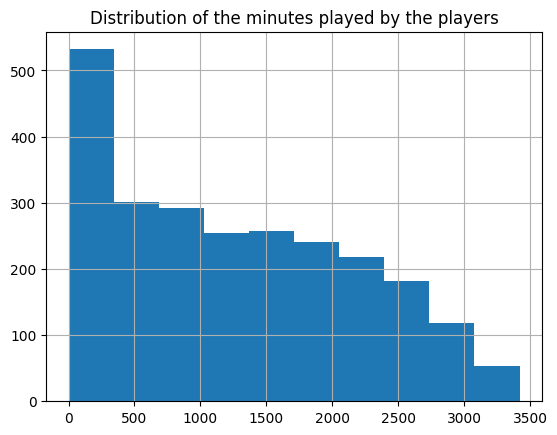

In [ ]:
datacp["minutes"].hist()
plt.title("Distribution of the minutes played by the players")
plt.show()

* In this chart, there is the distribution of time played by the players during a season.

* Assuming that a football player must play at least one full match (90 minutes) to provide informative statistics about himself, I exclude football players who play less than 90 minutes in a season from the dataset.

In [ ]:
datacp = datacp.drop(index=datacp[datacp["minutes"] < 90].index)

In [ ]:
datacp = datacp.reset_index(drop=True)

As a football data scientist, the selection and evaluation of players by coaches heavily rely on specific skill sets. These skills are essential in determining a player's suitability for different positions on the field. Let's delve into the skills required for various positions and the strategies employed to assess them:

1) When considering players for the central back position, key attributes such as defensive prowess, physical strength, and aerial ability are given significant importance. These qualities enable players to effectively handle defensive responsibilities and win aerial duels.

2) In the case of right back and left back positions, coaches primarily focus on defensive capabilities, physical attributes, dribbling proficiency, and passing accuracy. These skills are crucial for full-backs as they are responsible for both defensive duties and contributing to the team's attacking play.

3) Central midfielders are expected to possess exceptional passing abilities, as accurate and creative distribution of the ball is crucial in dictating the team's tempo and orchestrating attacking plays. Additionally, physicality plays a vital role in winning midfield battles and maintaining control of the game.

4) Defensive midfielders, often referred to as "destroyers" or "holding midfielders," are primarily responsible for breaking up the opposition's attacks and protecting the defensive line. Therefore, coaches look for players with strong defensive skills, effective tackling, interception capabilities, and physical presence in this position.

5) Attacking midfielders are responsible for creating goal-scoring opportunities and providing the final pass to forwards. Hence, coaches prioritize players with excellent offensive skills, including shooting accuracy, passing vision, dribbling ability, and creativity in their decision-making.

6) Strikers, the focal point of the team's attack, need to excel in several areas. Coaches typically consider a striker's proficiency in shooting accurately, physical strength to hold up play and win aerial duels, offensive positioning, and ability to link up with teammates to create goal-scoring chances.

7) Right-wing and left-wing forwards are expected to contribute significantly to the team's attack. Coaches assess their capabilities in shooting accurately, dribbling past opponents, delivering precise crosses, creative passing, and offensive decision-making to exploit the wide areas of the field.

It is evident that the required skills vary depending on the positions, and the emphasis placed on specific abilities depends on the team's playing style and tactical approach. As a football data scientist, I will employ feature extraction techniques to extract valuable insights from extensive player statistics. By combining domain knowledge, such as the literature review on relevant attributes, with advanced analytical methods, I will assign appropriate weights or coefficients to each statistic, enabling the discovery of players' underlying abilities and facilitating the recommendation process.

In [ ]:
player_df = datacp.drop(columns=["Column1","nationality","position","birth_year","foot","league","squad"])

In [ ]:
player_df.head()

,player,age,value,height,position2,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Martin Aguirregabiria,23,4000000,178,Defender - Right-Back,31,23,2099,1,1,0,0,5,1,0.04,0.04,0.09,0.04,0.09,0.9,0.9,1.0,0.04,0.04,0.08,0.04,0.08,23.3,3,1,0,33.3,0.13,0.04,0.33,1.00,0.30,0.1,0.1,722,1014,71.2,12629,6069,329,385,85.5,314,408,77.0,70,172,40.7,0.0,12,36,14,5,60,765,249,9,1,161,22,30,2,0,1,0,484,234,296,39,661,61,238,3,3,31,17,44,23,0.99,18,1,2,0,2,3,0.13,3,0,0,0,0,0,50,22,24,21,5,25,50,50.0,25,248,60,24.2,118,106,24,39,8,0,31,9,68,1,1231,83,395,675,223,9,986,14,26,53.8,16,3,636,3313,1909,677,608,89.8,20,17,0,32,19,1,0,1,0,207,23,20,53.5
1,Oliver Burke,22,4000000,188,Forward - Right Winger,31,14,1429,1,2,0,0,2,0,0.06,0.13,0.19,0.06,0.19,3.2,3.2,1.2,0.20,0.07,0.27,0.20,0.27,15.9,20,9,0,45.0,1.26,0.57,0.05,0.11,0.16,-2.2,-2.2,226,333,67.9,3022,738,149,191,78.0,61,95,64.2,7,16,43.8,0.8,6,9,6,0,18,323,10,0,1,90,3,19,0,0,0,0,204,72,57,28,230,46,7,2,1,4,5,17,16,1.01,12,0,3,0,0,2,0.13,2,0,0,0,0,0,20,5,7,8,5,9,23,39.1,14,270,56,20.7,49,145,76,25,2,0,23,6,14,0,526,23,80,246,242,57,516,26,44,59.1,29,0,326,2795,1676,615,356,57.9,32,33,0,19,11,1,0,0,0,75,23,38,37.7
2,Víctor Camarasa,25,4000000,183,Midfielder - Central Midfield,17,15,1293,0,1,0,0,1,0,0.00,0.07,0.07,0.00,0.07,0.3,0.3,1.6,0.02,0.11,0.13,0.02,0.13,14.4,8,2,0,25.0,0.56,0.14,0.00,0.00,0.04,-0.3,-0.3,430,533,80.7,8342,1719,187,222,84.2,177,201,88.1,60,94,63.8,-0.6,14,36,12,2,36,491,42,24,2,121,26,13,11,4,4,1,359,77,97,53,448,21,1,1,1,14,8,11,24,1.67,17,4,1,0,1,2,0.14,0,2,0,0,0,0,17,14,8,8,1,6,19,31.6,13,254,65,25.6,59,163,32,16,3,0,13,10,18,0,662,24,113,413,171,11,624,16,29,55.2,16,1,463,2401,976,512,432,84.4,23,12,0,14,15,2,0,0,0,114,12,15,44.4
3,Rubén Duarte,23,4000000,172,Defender - Left-Back,31,30,2663,0,1,0,0,11,0,0.00,0.03,0.03,0.00,0.03,1.3,1.3,0.9,0.04,0.03,0.08,0.04,0.08,29.6,20,8,0,40.0,0.68,0.27,0.00,0.00,0.06,-1.3,-1.3,933,1310,71.2,17336,8840,401,459,87.4,416,558,74.6,102,249,41.0,0.1,11,91,16,8,93

In [ ]:
player_df.isnull().sum().max()

0

* I applied normalization (Min Max scaler) to the statistics that I will use while determining the skills (shot, passes, dribbling, offensive, defensive, aerials, physical, creativity) of the players.

In [ ]:
columns_scaler = [ 'height', 'games', 'minutes',
       'goals', 'assists', 'xg', 'xa', 'minutes_90s', 'shots_total',
       'shots_on_target', 'shots_on_target_pct', 'goals_per_shot',
       'passes_completed', 'passes', 'passes_pct', 'passes_completed_short',
       'passes_pct_short', 'passes_completed_medium', 'passes_pct_medium',
       'passes_completed_long', 'passes_pct_long', 'passes_into_final_third',
       'passes_into_penalty_area', 'crosses_into_penalty_area',
       'progressive_passes', 'passes_live', 'passes_dead', 'passes_free_kicks',
       'through_balls', 'passes_pressure', 'passes_switches', 'crosses',
       'corner_kicks', 'passes_low', 'passes_ground', 'passes_high',
       'passes_left_foot', 'passes_right_foot', 'passes_head', 'throw_ins',
       'sca', 'gca', 'tackles', 'tackles_won', 'tackles_def_3rd',
       'tackles_mid_3rd', 'tackles_att_3rd', 'pressures', 'pressure_regains',
       'pressure_regain_pct', 'pressures_def_3rd', 'pressures_mid_3rd',
       'pressures_att_3rd', 'blocks', 'interceptions', 'clearances', 'errors',
       'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_pen_area', 'dribbles_completed',
       'dribbles_completed_pct','players_dribbled_past', 'carries', 'carry_distance', 'miscontrols',
       'dispossessed', 'ball_recoveries', 'aerials_won_pct']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
for i in columns_scaler:
  scaler = MinMaxScaler()
  player_df["scale_" + i] = scaler.fit_transform(player_df[i].values.reshape(-1,1))

In [ ]:
player_df.head()

,player,age,value,height,position2,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,scale_height,scale_games,scale_minutes,scale_goals,scale_assists,scale_xg,scale_xa,scale_minutes_90s,scale_shots_total,scale_shots_on_target,scale_shots_on_target_pct,scale_goals_per_shot,scale_passes_completed,scale_passes,scale_passes_pct,scale_passes_completed_short,scale_passes_pct_short,scale_passes_completed_medium,scale_passes_pct_medium,scale_passes_completed_long,scale_passes_pct_long,scale_passes_into_final_third,scale_passes_into_penalty_area,scale_crosses_into_penalty_area,scale_progressive_passes,scale_passes_live,scale_passes_dead,scale_passes_free_kicks,scale_through_balls,scale_passes_pressure,scale_passes_switches,scale_crosses,scale_corner_kicks,scale_passes_low,scale_passes_ground,scale_passes_high,scale_passes_left_foot,scale_passes_right_foot,scale_passes_head,scale_throw_ins,scale_sca,scale_gca,scale_tackles,scale_tackles_won,scale_tackles_def_3rd,scale_tackles_mid_3rd,scale_tackles_att_3rd,scale_pressures,scale_pressure_regains,scale_pressure_regain_pct,scale_pressures_def_3rd,scale_pressures_mid_3rd,scale_pressures_att_3rd,scale_blocks,scale_interceptions,scale_clearances,scale_errors,scale_touches,scale_touches_def_pen_area,scale_touches_def_3rd,scale_touches_mid_3rd,scale_touches_att_3rd,scale_touches_att_pen_area,scale_dribbles_completed,scale_dribbles_completed_pct,scale_players_dribbled_past,scale_carries,scale_carry_distance,scale_miscontrols,scale_dispossessed,scale_ball_recoveries,scale_aerials_won_pct
0,Martin Aguirregabiria,23,4000000,178,Defender - Right-Back,31,23,2099,1,1,0,0,5,1,0.04,0.04,0.09,0.04,0.09,0.9,0.9,1.0,0.04,0.04,0.08,0.04,0.08,23.3,3,1,0,33.3,0.13,0.04,0.33,1.00,0.30,0.1,0.1,722,1014,71.2,12629,6069,329,385,85.5,314,408,77.0,70,172,40.7,0.0,12,36,14,5,60,765,249,9,1,161,22,30,2,0,1,0,484,234,296,39,661,61,238,3,3,31,17,44,23,0.99,18,1,2,0,2,3,0.13,3,0,0,0,0,0,50,22,24,21,5,25,50,50.0,25,248,60,24.2,118,106,24,39,8,0,31,9,

* Creation of the skills of football players from statistics with domain information.

In [ ]:
player_df["PASSES"] = (player_df["scale_passes_pct"]*0.2 + player_df["scale_passes_completed"]*0.15 + player_df["scale_passes_pct_long"]*0.05 +
                            player_df["scale_progressive_passes"]*0.1 + player_df["scale_passes_pressure"]*0.05 +
                            player_df["scale_through_balls"]*0.1 + player_df["scale_passes_switches"]*0.05 +
                            player_df["scale_passes_into_final_third"]*0.05 + player_df["scale_assists"]*0.25)

player_df["DRIBBLING"] = (player_df["scale_dribbles_completed_pct"]*0.30 + player_df["scale_dribbles_completed"]*0.25 + player_df["scale_players_dribbled_past"]*0.20 +
                            player_df["scale_carries"]*0.15 + player_df["scale_carry_distance"]*0.10)

player_df["SHOTS"] = (player_df["scale_goals"]*0.2 + player_df["scale_shots_on_target_pct"]*0.2 +
                            player_df["scale_goals_per_shot"]*0.35 + player_df["scale_xg"]*0.15 + player_df["scale_shots_total"]*0.1)

player_df["AERIALS"] = (player_df["scale_aerials_won_pct"]*0.5 + player_df["scale_passes_head"]*0.2 +
                            player_df["scale_touches_att_pen_area"]*0.1 + player_df["scale_touches_def_pen_area"]*0.1 +
                            player_df["scale_clearances"]*0.1)

player_df["CREATIVITY"] = (player_df["scale_assists"]*0.2 + player_df["scale_xa"]*0.15 +
                            player_df["scale_sca"]*0.35 + player_df["scale_gca"]*0.3)

player_df["DEFFANSIVE"] = (player_df["scale_tackles"]*0.2 + player_df["scale_interceptions"]*0.2 + player_df["scale_blocks"]*0.2 +
                            player_df["scale_ball_recoveries"]*0.1 + player_df["scale_pressures_def_3rd"]*0.1 +
                            player_df["scale_clearances"]*0.1 + player_df["scale_touches_def_pen_area"]*0.1)

player_df["OFFANSIVE"] = (player_df["scale_goals"]*0.20 + player_df["scale_assists"]*0.15 + player_df["scale_xg"]*0.15 +
                            player_df["scale_touches_att_3rd"]*0.20 + player_df["scale_through_balls"]*0.15 +
                            player_df["scale_progressive_passes"]*0.15)

player_df["PHSICAL"] = (player_df["scale_minutes"]*0.25 + player_df["scale_games"]*0.1 + player_df["scale_touches"]*0.25 +
                            player_df["scale_height"]*0.05 + player_df["scale_ball_recoveries"]*0.1 +
                            player_df["scale_aerials_won_pct"]*0.1 + player_df["scale_pressures"]*0.15 )

In [ ]:
player_df.head()

,player,age,value,height,position2,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,scale_height,scale_games,scale_minutes,scale_goals,scale_assists,scale_xg,scale_xa,scale_minutes_90s,scale_shots_total,scale_shots_on_target,scale_shots_on_target_pct,scale_goals_per_shot,scale_passes_completed,scale_passes,scale_passes_pct,scale_passes_completed_short,scale_passes_pct_short,scale_passes_completed_medium,scale_passes_pct_medium,scale_passes_completed_long,scale_passes_pct_long,scale_passes_into_final_third,scale_passes_into_penalty_area,scale_crosses_into_penalty_area,scale_progressive_passes,scale_passes_live,scale_passes_dead,scale_passes_free_kicks,scale_through_balls,scale_passes_pressure,scale_passes_switches,scale_crosses,scale_corner_kicks,scale_passes_low,scale_passes_ground,scale_passes_high,scale_passes_left_foot,scale_passes_right_foot,scale_passes_head,scale_throw_ins,scale_sca,scale_gca,scale_tackles,scale_tackles_won,scale_tackles_def_3rd,scale_tackles_mid_3rd,scale_tackles_att_3rd,scale_pressures,scale_pressure_regains,scale_pressure_regain_pct,scale_pressures_def_3rd,scale_pressures_mid_3rd,scale_pressures_att_3rd,scale_blocks,scale_interceptions,scale_clearances,scale_errors,scale_touches,scale_touches_def_pen_area,scale_touches_def_3rd,scale_touches_mid_3rd,scale_touches_att_3rd,scale_touches_att_pen_area,scale_dribbles_completed,scale_dribbles_completed_pct,scale_players_dribbled_past,scale_carries,scale_carry_distance,scale_miscontrols,scale_dispossessed,scale_ball_recoveries,scale_aerials_won_pct,PASSES,DRIBBLING,SHOTS,AERIALS,CREATIVITY,DEFFANSIVE,OFFANSIVE,PHSICAL
0,Martin Aguirregabiria,23,4000000,178,Defender - Right-Back,31,23,2099,1,1,0,0,5,1,0.04,0.04,0.09,0.04,0.09,0.9,0.9,1.0,0.04,0.04,0.08,0.04,0.08,23.3,3,1,0,33.3,0.13,0.04,0.33,1.00,0.30,0.1,0.1,722,1014,71.2,12629,6069,329,385,85.5,314,408,77.0,70,172,40.7,0.0,12,36,14,5,60,765,249,9,1,161,22,30,2,0,1,0,484,234,296,39,661,61,238,3,3,31,17,44,23,0.99,18,1,2,0,2,3,0.13,3,0,

In [ ]:
df_talents = player_df[["player","position2","age","value","PASSES","DRIBBLING","SHOTS","AERIALS","CREATIVITY","DEFFANSIVE","OFFANSIVE","PHSICAL"]]

In [ ]:
df_talents.reset_index(drop=True, inplace=True)

To understand the types of skills predominantly required in different positions, I will categorize football players based on their playing positions and examine them on radar charts.

In [ ]:
position = df_talents.groupby("position2").agg({"PASSES":"mean","DRIBBLING":"mean","SHOTS":"mean","AERIALS":"mean","CREATIVITY":"mean",
                                                "DEFFANSIVE":"mean","OFFANSIVE":"mean","PHSICAL":"mean"}).reset_index()

In [ ]:
position

,position2,PASSES,DRIBBLING,SHOTS,AERIALS,CREATIVITY,DEFFANSIVE,OFFANSIVE,PHSICAL
0,Defender - Centre-Back,0.273077,0.275211,0.090029,0.421289,0.030304,0.266763,0.042369,0.396376
1,Defender - Left-Back,0.246013,0.271847,0.077799,0.315884,0.092869,0.229136,0.087846,0.367317
2,Defender - Right-Back,0.249493,0.276066,0.077091,0.320883,0.092630,0.244694,0.089940,0.382719
3,Forward - Centre-Forward,0.191453,0.244145,0.193366,0.234625,0.126647,0.078544,0.126912,0.312200
4,Forward - Left Winger,0.221248,0.305083,0.160129,0.193505,0.153091,0.125726,0.130019,0.323232
5,Forward - Right Winger,0.218626,0.295589,0.144159,0.204993,0.156537,0.121402,0.124221,0.308035
6,Midfielder - Attacking Midfield,0.252407,0.291696,0.132357,0.204227,0.163488,0.125788,0.127834,0.321245
7,Midfielder - Central Midfield,0.284784,0.303523,0.100391,0.276605,0.118407,0.211571,0.100263,0.389237
8,Midfielder - Defensive Midfield,0.297937,0.310454,0.076921,0.343686,0.088427,0.266003,0.080108,0.424585
9,Midfielder - Left Midfield,0.246586,0.296269,0.118411,0.273834,0.159740,0.197632,0.122626,0.385342


In [ ]:
## range values
ranges = [(0,100), (0,100), (0,100), (0,100),
          (0,100), (0,100), (0,100), (0,100)]

In [ ]:
a_values = []

def attribute (nama) :
    params = list(position.columns)

    ## parameter value
    for x in range(len(position['position2'])):
        if position['position2'][x] == nama:
          params = params[1:9]
          a_values = position.iloc[x].values.tolist()
    values = a_values[1:9]
    #display of values as percentages on the radar chart, depending on the distribution of skills
    values_ = []
    values_.append((values[0]*100)/0.4)
    values_.append((values[1]*100)/0.4)
    values_.append((values[2]*100)/0.25)
    values_.append((values[3]*100)/0.5)
    values_.append((values[4]*100)/0.2)
    values_.append((values[5]*100)/0.35)
    values_.append((values[6]*100)/0.15)
    values_.append((values[7]*100)/0.5)

    ## title values
    title = dict(
        title_name=nama,
        title_color="#E3DDED",
        subtitle_color="#C72C41",
        title_name_2="Atributte",
        title_color_2="#E3DDED",
        subtitle_color_2='#C72C41',
        title_fontsize=18,
        subtitle_fontsize=15)

    ## endnote
    endnote = ""

    ## instantiate object
    radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#FFFFFF",
              range_color="#FFFFFF", range_fontsize=9)

    ## plot radar
    fig, ax = radar.plot_radar(ranges=ranges, params=params,
                           values=values_, radar_color=['#1c547f', '#CF6679'],
                              title=title, endnote=endnote )


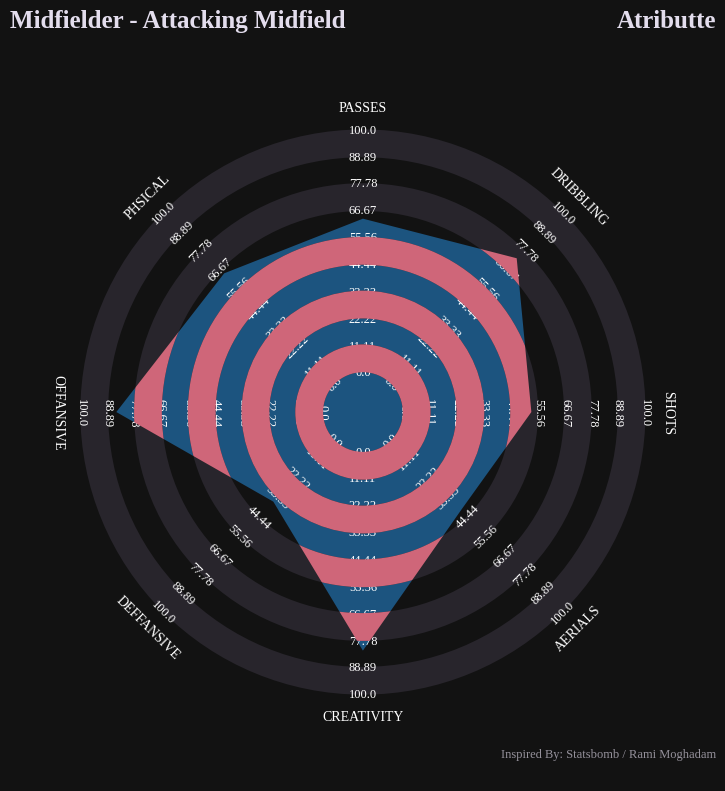

In [ ]:
attribute("Midfielder - Attacking Midfield")

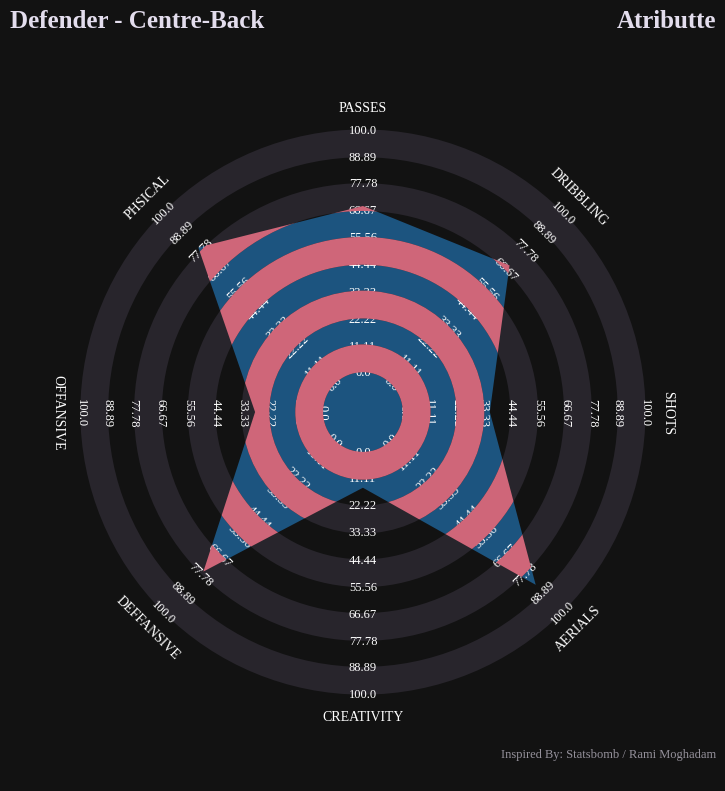

In [ ]:
attribute("Defender - Centre-Back")

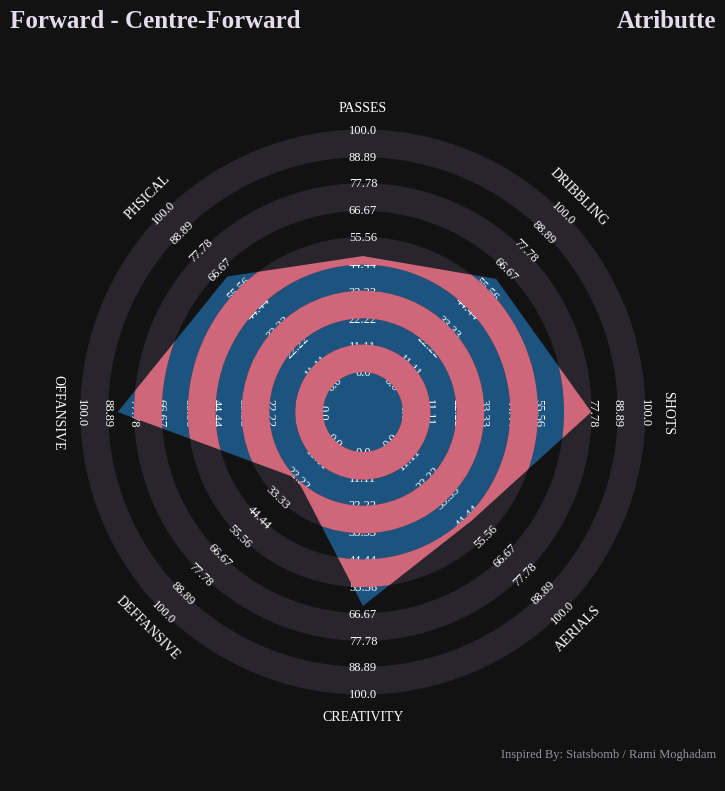

In [ ]:
attribute("Forward - Centre-Forward")

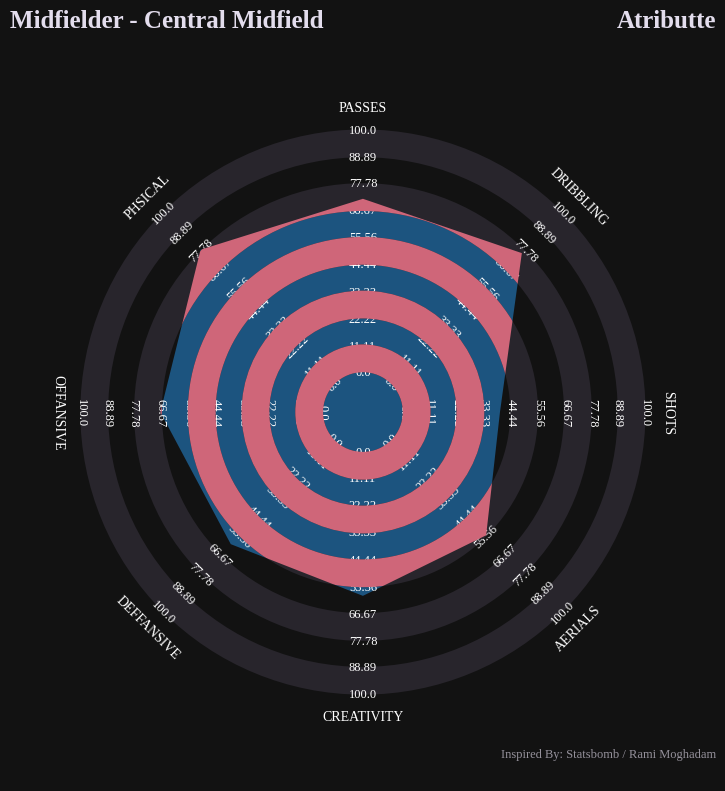

In [ ]:
attribute("Midfielder - Central Midfield")

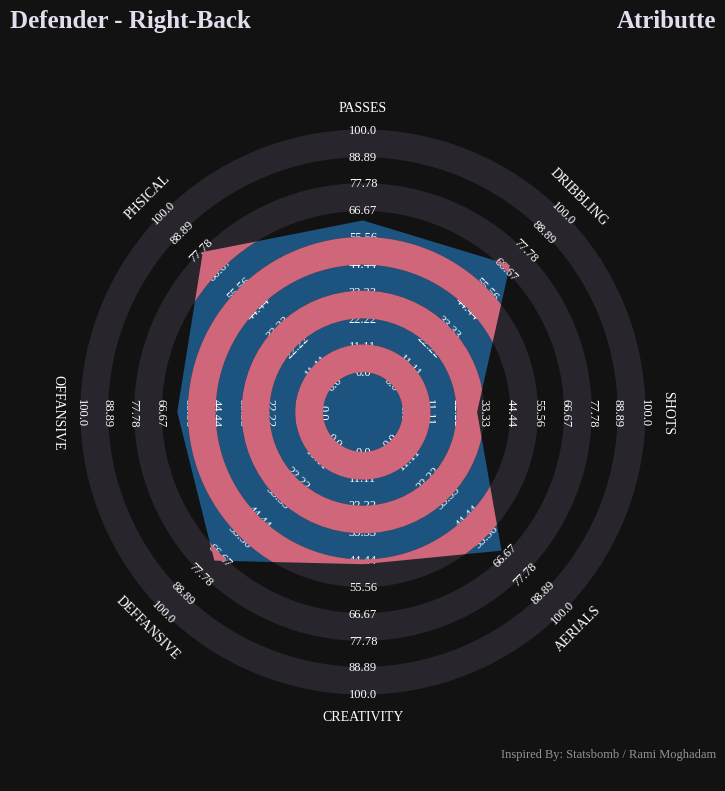

In [ ]:
attribute("Defender - Right-Back")

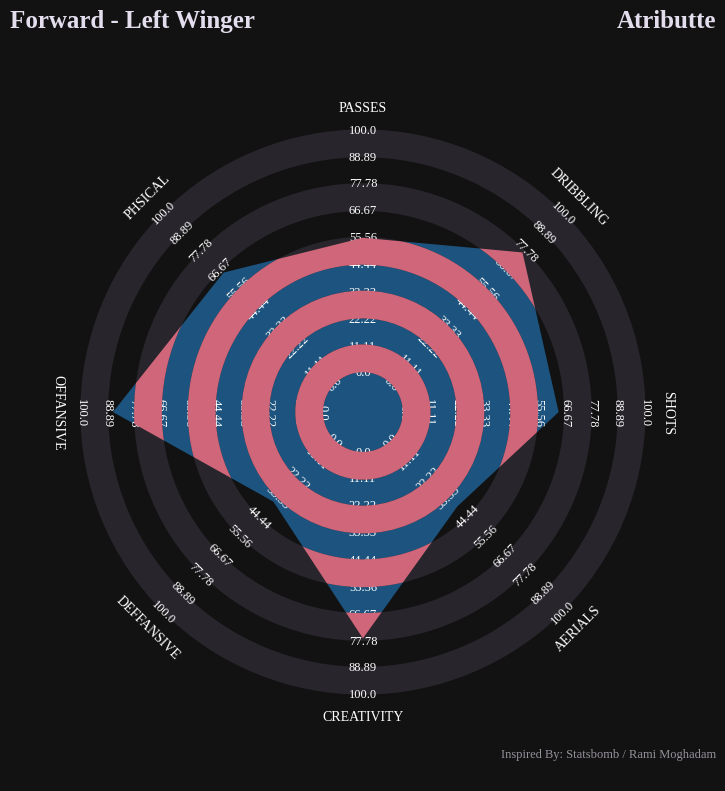

In [ ]:
attribute("Forward - Left Winger")

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'PASSES'}>],
       [<Axes: title={'center': 'DRIBBLING'}>,
        <Axes: title={'center': 'SHOTS'}>,
        <Axes: title={'center': 'AERIALS'}>],
       [<Axes: title={'center': 'CREATIVITY'}>,
        <Axes: title={'center': 'DEFFANSIVE'}>,
        <Axes: title={'center': 'OFFANSIVE'}>],
       [<Axes: title={'center': 'PHSICAL'}>, <Axes: >, <Axes: >]],
      dtype=object)

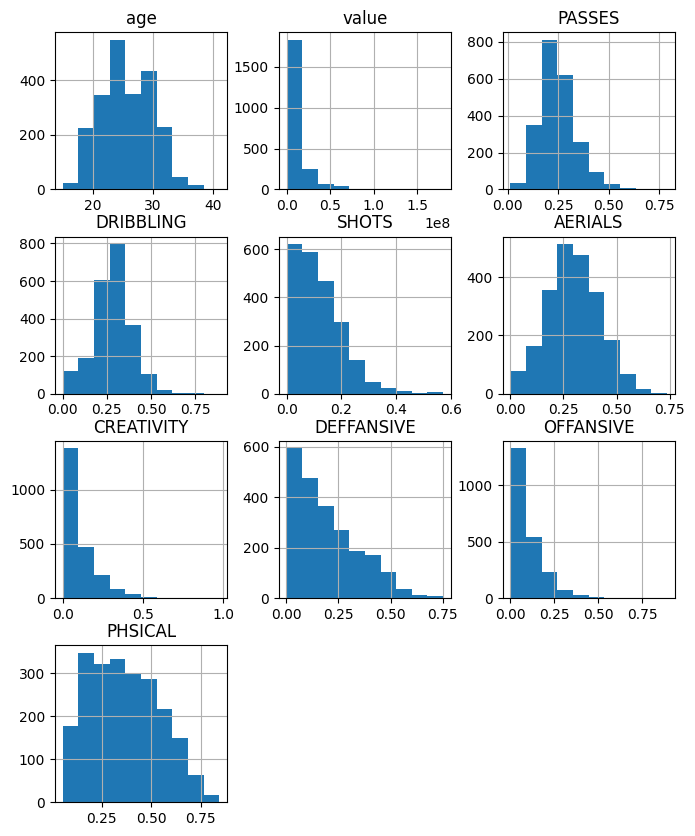

In [ ]:
df_talents.hist(figsize=[8,10])

In [ ]:
## range values
ranges = [(0,100), (0,100), (0,100), (0,100),
          (0,100), (0,100), (0,100), (0,100)]

In [ ]:
a_values = []

def attribute (nama) :
    params = list(df_talents.columns)

    ## parameter value
    for x in range(len(df_talents['player'])):
        if df_talents['player'][x] == nama:
          params = params[4:12]
          a_values = df_talents.iloc[x].values.tolist()
    values = a_values[4:12]
    #display of values as percentages on the radar chart, depending on the distribution of skills
    values_ = []
    values_.append((values[0]*100)/0.5)
    values_.append((values[1]*100)/0.6)
    values_.append((values[2]*100)/0.4)
    values_.append((values[3]*100)/0.6)
    values_.append((values[4]*100)/0.4)
    values_.append((values[5]*100)/0.6)
    values_.append((values[6]*100)/0.4)
    values_.append((values[7]*100)/0.7)


    ## title values
    title = dict(
        title_name=nama,
        title_color="#E3DDED",
        subtitle_color="#C72C41",
        title_name_2="Atributte",
        title_color_2="#E3DDED",
        subtitle_color_2='#C72C41',
        title_fontsize=18,
        subtitle_fontsize=15)

    ## endnote
    endnote = ""

    ## instantiate object
    radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#FFFFFF",
              range_color="#FFFFFF", range_fontsize=9)

    ## plot radar
    fig, ax = radar.plot_radar(ranges=ranges, params=params,
                           values=values_, radar_color=['#1c547f', '#CF6679'],
                              title=title, endnote=endnote)

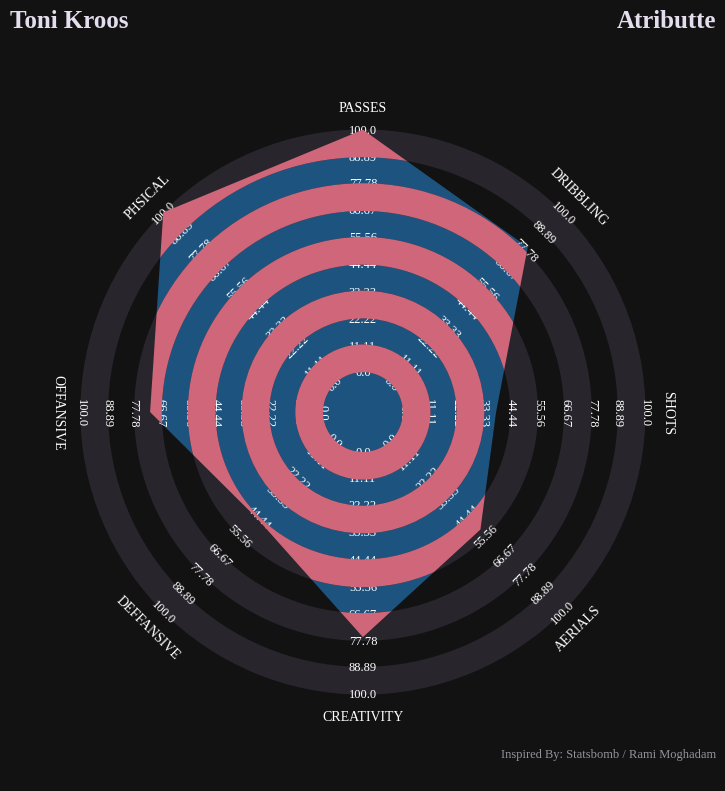

In [ ]:
attribute("Toni Kroos")

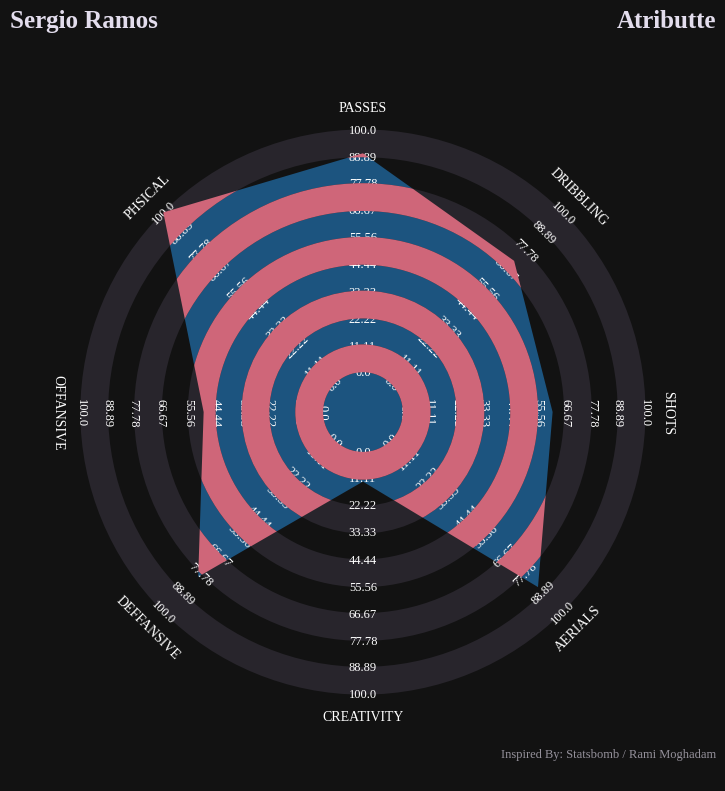

In [ ]:
attribute("Sergio Ramos")

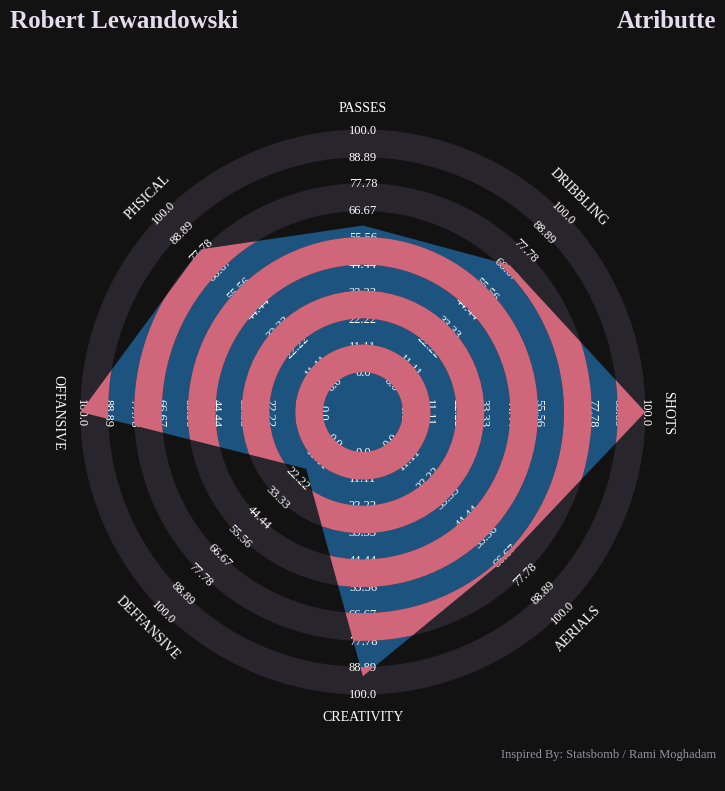

In [ ]:
attribute("Robert Lewandowski")

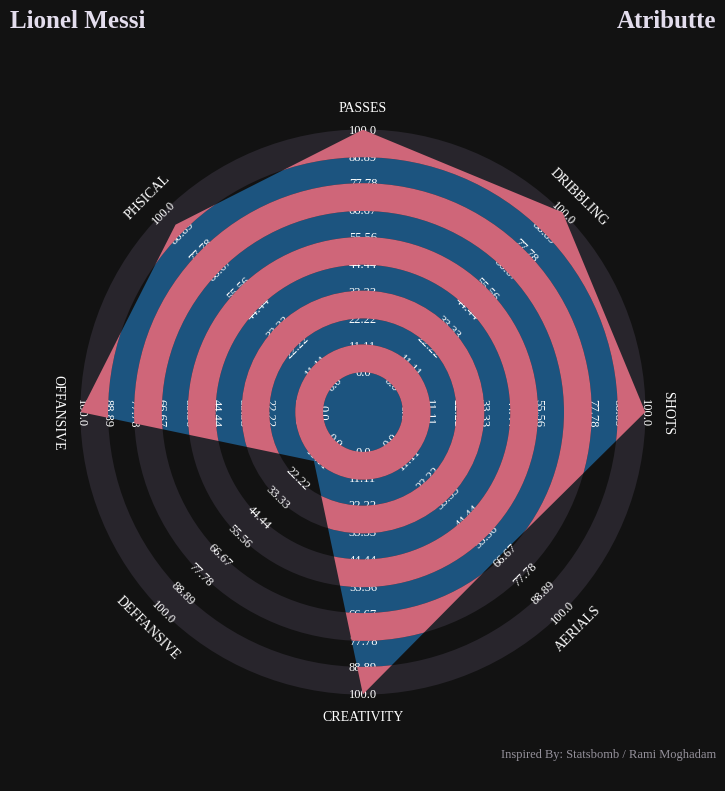

In [ ]:
attribute("Lionel Messi")

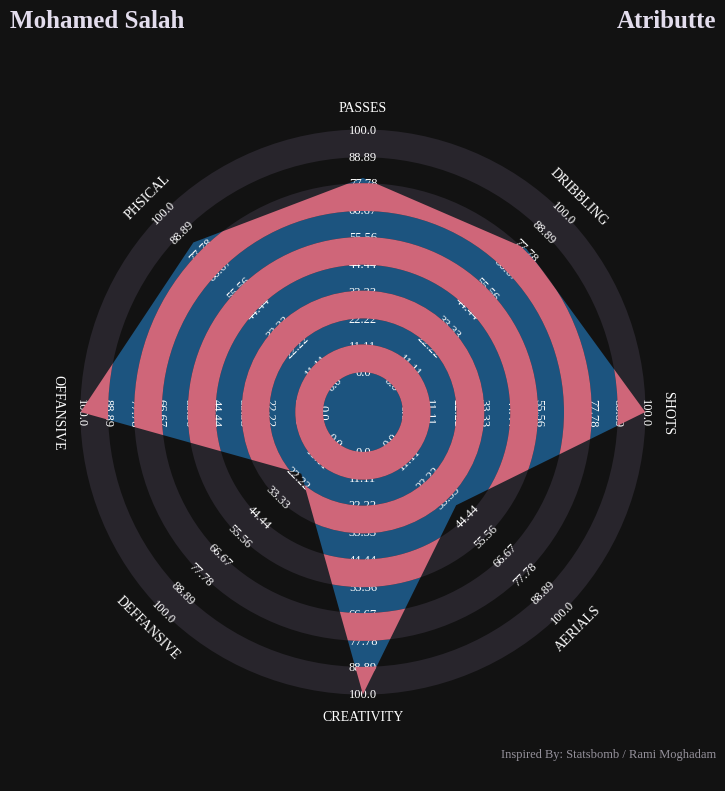

In [ ]:
attribute("Mohamed Salah")

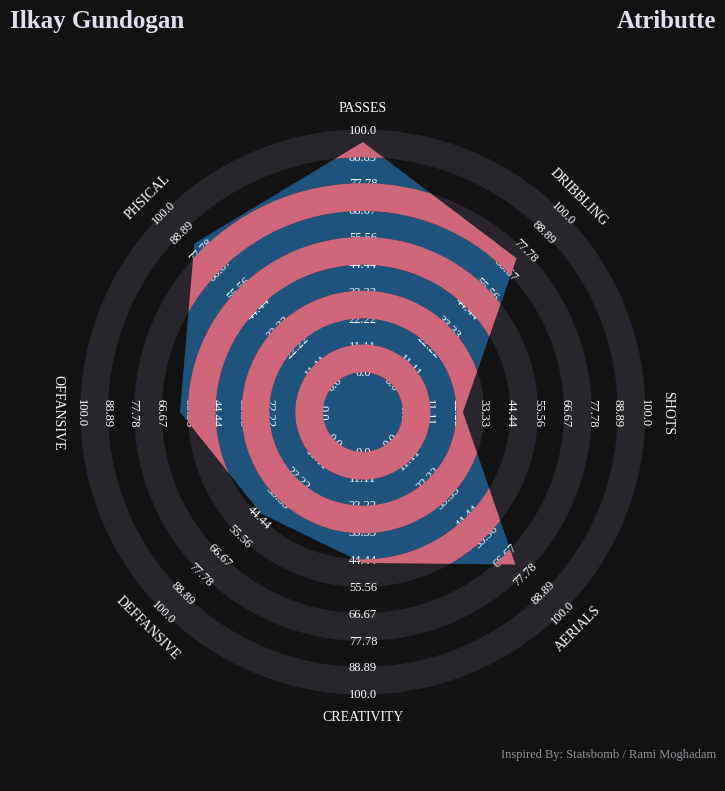

In [ ]:
attribute("Ilkay Gundogan")

In [ ]:
df_talents.head()

,player,position2,age,value,PASSES,DRIBBLING,SHOTS,AERIALS,CREATIVITY,DEFFANSIVE,OFFANSIVE,PHSICAL
0,Martin Aguirregabiria,Defender - Right-Back,23,4000000,0.220604,0.258144,0.194095,0.375794,0.078937,0.286302,0.079429,0.493153
1,Oliver Burke,Forward - Right Winger,22,4000000,0.165462,0.280599,0.140714,0.266561,0.070722,0.133773,0.082050,0.356477
2,Víctor Camarasa,Midfielder - Central Midfield,25,4000000,0.244909,0.248211,0.055718,0.259193,0.077072,0.136853,0.056132,0.328906
3,Rubén Duarte,Defender - Left-Back,23,4000000,0.257331,0.201074,0.097295,0.429082,0.125194,0.438566,0.104291,0.595556
4,Rodrigo Ely,Defender - Centre-Back,25,1000000,0.236145,0.359081,0.233491,0.554528,0.003968,0.320710,0.032378,0.488419


In [ ]:
df_model = df_talents[["PASSES","DRIBBLING","SHOTS","AERIALS","CREATIVITY","DEFFANSIVE","OFFANSIVE","PHSICAL"]]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(df_model)
cosine_sim

array([[1.        , 0.97857486, 0.96280128, ..., 0.81867766, 0.77768396,
        0.9444581 ],
       [0.97857486, 1.        , 0.97704645, ..., 0.90368571, 0.85092802,
        0.95255431],
       [0.96280128, 0.97704645, 1.        , ..., 0.89896268, 0.87614106,
        0.98152983],
       ...,
       [0.81867766, 0.90368571, 0.89896268, ..., 1.        , 0.83966585,
        0.86122759],
       [0.77768396, 0.85092802, 0.87614106, ..., 0.83966585, 1.        ,
        0.9012718 ],
       [0.9444581 , 0.95255431, 0.98152983, ..., 0.86122759, 0.9012718 ,
        1.        ]])

In [ ]:
indices = pd.Series(df_talents.index, index=df_talents['player'])
indices

player
Martin Aguirregabiria       0
Oliver Burke                1
Víctor Camarasa             2
Rubén Duarte                3
Rodrigo Ely                 4
                         ... 
Daniel Podence           2205
Romain Saïss             2206
Adama Traoré             2207
Jesús Vallejo            2208
Rúben Vinagre            2209
Length: 2210, dtype: int64

In [ ]:
def get_recommendations(player, cosine_sim=cosine_sim):

    idx = indices[player] # Index values corresponding to each football player

    sim_scores = list(enumerate(cosine_sim[idx])) # bilateral similarity scores between football players

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # Sorting by similarity ratios

    sim_scores = sim_scores[1:11] # Top 10 most similar football players

    player_indices = [i[0] for i in sim_scores] # Index values of these football players

    return df_talents['player'].iloc[player_indices] # Show the 10 most similar football players

In [ ]:
get_recommendations('Sergio Ramos')

1592    Lukas Klostermann
896      Leonardo Bonucci
660            Tom Davies
828         Marko GrujiÄ‡
640           David Lopez
1135        Lucas Tousart
1217      Scott McTominay
1964       Moussa Sissoko
577       Lukasz Piszczek
892        Stefan de Vrij
Name: player, dtype: object

In [ ]:
#add ranges to list of tuple pairs
a_values = []
b_values = []

def compparison_player (nama1, nama2) :
    params = list(df_talents.columns)

    for x in range(len(df_talents['player'])):
        if df_talents['player'][x] == nama1:
          pos = 0
          params = params[4:12]
          a_values = df_talents.iloc[x].values.tolist()

        if df_talents['player'][x] == nama2:
            b_values = df_talents.iloc[x].values.tolist()
    #display of values as percentages on the radar chart, depending on the distribution of skills
    a_values = a_values[4:12]
    b_values = b_values[4:12]

    a_values_ = []
    a_values_.append((a_values[0]*100)/0.5)
    a_values_.append((a_values[1]*100)/0.6)
    a_values_.append((a_values[2]*100)/0.4)
    a_values_.append((a_values[3]*100)/0.6)
    a_values_.append((a_values[4]*100)/0.4)
    a_values_.append((a_values[5]*100)/0.6)
    a_values_.append((a_values[6]*100)/0.4)
    a_values_.append((a_values[7]*100)/0.7)

    b_values_ = []
    b_values_.append((b_values[0]*100)/0.5)
    b_values_.append((b_values[1]*100)/0.6)
    b_values_.append((b_values[2]*100)/0.4)
    b_values_.append((b_values[3]*100)/0.6)
    b_values_.append((b_values[4]*100)/0.4)
    b_values_.append((b_values[5]*100)/0.6)
    b_values_.append((b_values[6]*100)/0.4)
    b_values_.append((b_values[7]*100)/0.7)

    print (x)
    values = [a_values_,b_values_]
    #title

    title = dict(
    title_name=nama1,
    title_color = 'red',
    subtitle_color = 'red',
    title_name_2=nama2,
    title_color_2 = 'blue',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15)

    radar = Radar(range_fontsize=9)

    fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,
                         compare=True)

2209


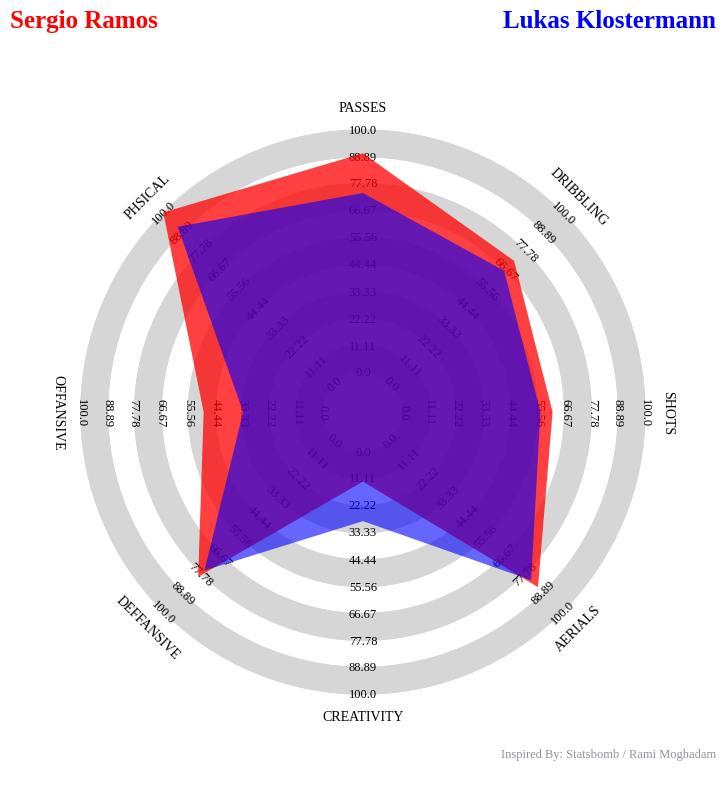

In [ ]:
compparison_player ('Sergio Ramos', 'Lukas Klostermann')

In [ ]:
get_recommendations('Paulo Dybala')

1955         Son Heung-min
1411         Dries Mertens
1193          Riyad Mahrez
234           Serge Gnabry
119             Papu Gomez
1597    Christopher Nkunku
1277         Alassane Plea
1542        ángel Di María
1236         Dimitri Payet
122           Josip Ilicic
Name: player, dtype: object

2209


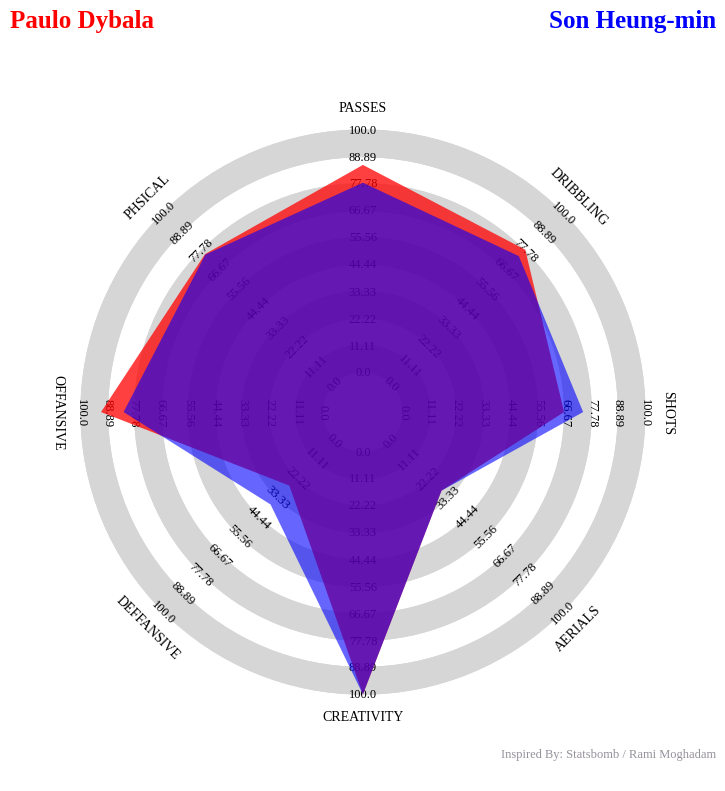

In [ ]:
compparison_player ('Paulo Dybala', 'Son Heung-min')

In [ ]:
get_recommendations('David Alaba')

1196               Rodri
1201         Kyle Walker
1586         Diego Demme
91          Granit Xhaka
2097     Xavi QuintillĂ 
221        Sergi Roberto
70      Mattéo Guendouzi
583          Axel Witsel
1328        Adrien Silva
287          Andrea Poli
Name: player, dtype: object

2209


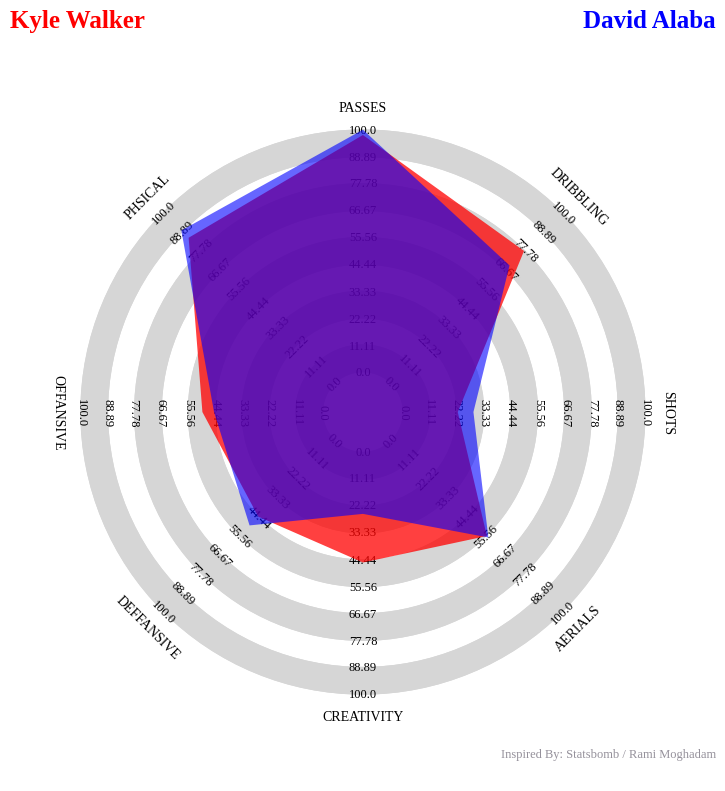

In [ ]:
compparison_player ('Kyle Walker', 'David Alaba')